<a href="https://colab.research.google.com/github/BayramGurbuz/screw-anomaly-detection/blob/main/screw_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow
!pip install ultralytics
!pip install opencv-python-headless matplotlib
!pip install roboflow inference supervision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 102.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.4 MB/s eta 0:00:00
   ━

In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="dXST4zkq3TTQ5ff2Vsz2")
project = rf.workspace("bayram-grbz").project("screw-anomaly-detection-hiyz6")
version = project.version(2)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to screw-anomaly-detection-2 in yolov8-obb:: 100%|██████████| 686/686 [00:00<00:00, 6555.17it/s]


In [2]:
import yaml

yaml_path = dataset.location + "/data.yaml"

with open(yaml_path) as f:
    data = yaml.safe_load(f)

data['path'] = dataset.location

with open(yaml_path, 'w') as f:
    yaml.dump(data, f, sort_keys=False)

In [3]:
from ultralytics import YOLO

model = YOLO('yolov8x-obb.pt')
model.train(data=f'{dataset.location}/data.yaml', epochs=60, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 133M/133M [00:10<00:00, 13.0MB/s]


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/screw-anomaly-detection-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8x-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

100%|██████████| 755k/755k [00:00<00:00, 98.0MB/s]

Overriding model.yaml nc=15 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           


  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640, 640, 3, 2]              
  8                  -1  3   6969600  ultralytics.nn.modules.block.C2f             [640, 640, 3, True]           
  9                  -1  1   1025920  ultralytics.nn.modules.block.SPPF            [640, 640, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  3   7379200  ultralytics.nn.modules.block.C2f             [1280, 640, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  3   1948800  ultralytics.nn.modules.block.C2f             [960,

100%|██████████| 5.35M/5.35M [00:00<00:00, 313MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 708.8±211.0 MB/s, size: 23.9 KB)


train: Scanning /content/screw-anomaly-detection-2/train/labels... 304 images, 0 backgrounds, 0 corrupt: 100%|██████████| 304/304 [00:00<00:00, 2165.37it/s]

train: New cache created: /content/screw-anomaly-detection-2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 490.2±238.5 MB/s, size: 23.5 KB)


val: Scanning /content/screw-anomaly-detection-2/valid/labels... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<00:00, 868.79it/s]

val: New cache created: /content/screw-anomaly-detection-2/valid/labels.cache


Plotting labels to runs/obb/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 103 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      11.9G      1.971      5.624      2.192         29        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.42it/s]

                   all         17         18     0.0457      0.567     0.0825     0.0299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      12.7G      1.524      3.431      1.803         27        640: 100%|██████████| 19/19 [00:24<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         17         18      0.602      0.388      0.361      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60        13G      1.349      2.393       1.69         24        640: 100%|██████████| 19/19 [00:26<00:00,  1.37s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         17         18     0.0662      0.667     0.0665     0.0297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      12.7G      1.236      1.922      1.581         22        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         17         18      0.622       0.62      0.667      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60        13G      1.183      1.572      1.603         23        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         17         18      0.676      0.633      0.641      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60        13G      1.161      1.259      1.548         22        640: 100%|██████████| 19/19 [00:25<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         17         18      0.453      0.483      0.433      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60        13G       1.22      1.332      1.626         18        640: 100%|██████████| 19/19 [00:24<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         17         18       0.37      0.507      0.442        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60        13G      1.089      1.119      1.473         20        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         17         18      0.729      0.562      0.597      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      12.7G      1.099      1.062      1.479         20        640: 100%|██████████| 19/19 [00:25<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.74it/s]

                   all         17         18      0.843      0.583      0.606      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60        13G      1.081     0.9806      1.498         24        640: 100%|██████████| 19/19 [00:25<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.24it/s]

                   all         17         18      0.353      0.609      0.433      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      12.6G      1.047     0.9498      1.456         32        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         17         18       0.55      0.564      0.534      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      12.6G      1.006     0.8025      1.379         23        640: 100%|██████████| 19/19 [00:24<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.26it/s]

                   all         17         18      0.565      0.483      0.514      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      12.7G     0.9827     0.8078       1.35         28        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         17         18      0.488      0.617      0.585      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60        13G     0.9825     0.8009      1.401         34        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         17         18      0.593      0.679      0.663      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      12.6G     0.9552      0.758      1.407         34        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         17         18      0.815      0.591       0.61      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60        13G     0.9193     0.6938      1.334         19        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         17         18      0.767      0.612      0.676      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      12.7G     0.8441     0.7246      1.306         22        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         17         18      0.778      0.619      0.642      0.309



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60        13G     0.9044     0.7533      1.324         25        640: 100%|██████████| 19/19 [00:25<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         17         18      0.854        0.7      0.668      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      12.6G     0.8743     0.6854      1.303         27        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         17         18      0.855       0.55      0.568      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60        13G     0.8771     0.6912      1.317         33        640: 100%|██████████| 19/19 [00:24<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         17         18      0.688        0.7      0.741      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      12.8G     0.8731     0.6648      1.345         21        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         17         18      0.714       0.75      0.778      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      12.6G     0.8056      0.609      1.279         30        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         17         18      0.579      0.593      0.671      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60        13G     0.7845     0.5888      1.238         35        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         17         18      0.514      0.667      0.612      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60        13G     0.8093     0.5914      1.247         25        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         17         18      0.518        0.7      0.675      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      12.8G      0.759     0.5333      1.179         27        640: 100%|██████████| 19/19 [00:24<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         17         18      0.731      0.745      0.718      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      12.6G     0.7303     0.5261      1.219         25        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         17         18      0.826      0.663       0.65      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      12.6G     0.7191     0.5419       1.18         23        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         17         18       0.75      0.564      0.546      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      12.6G     0.7323     0.5023      1.199         32        640: 100%|██████████| 19/19 [00:24<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         17         18      0.812      0.557      0.643      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      12.8G     0.7476     0.5637        1.2         26        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         17         18      0.582       0.65      0.691      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      12.6G     0.7374     0.5421      1.189         21        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         17         18      0.612       0.65      0.695       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      12.6G     0.7195     0.5212      1.194         17        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.22it/s]

                   all         17         18      0.802      0.686      0.679      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60        13G     0.6996     0.5278       1.16         34        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         17         18      0.811      0.696      0.677      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      12.7G     0.6666     0.4869      1.159         24        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         17         18      0.735      0.611      0.626      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60        13G     0.6867      0.489      1.155         21        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         17         18      0.732      0.632      0.586      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      12.6G     0.6957     0.4869      1.173         23        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         17         18      0.655      0.676      0.638      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      12.6G     0.6568     0.4768      1.122         25        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         17         18      0.804      0.596      0.714      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      12.8G     0.6606     0.4888      1.116         25        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         17         18      0.816        0.6      0.645      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      12.6G     0.6166     0.4373       1.15         23        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         17         18      0.706      0.667       0.71      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      12.6G     0.6243     0.4372      1.124         23        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.97it/s]

                   all         17         18      0.916      0.662      0.745      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60        13G     0.6238     0.4821      1.126         20        640: 100%|██████████| 19/19 [00:25<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         17         18      0.609      0.713      0.715      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      12.8G     0.6122     0.4578      1.105         22        640: 100%|██████████| 19/19 [00:24<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         17         18      0.819      0.644      0.707      0.283



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60        13G     0.5857     0.4127      1.131         25        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         17         18      0.709      0.561       0.62      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      12.6G     0.5838     0.4398      1.108         23        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.29it/s]

                   all         17         18      0.706      0.567      0.502       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      12.6G     0.5759       0.42      1.089         25        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]

                   all         17         18      0.711      0.627      0.588      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      12.8G     0.5672     0.4017      1.081         18        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.06it/s]

                   all         17         18      0.645        0.5       0.47      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      12.6G     0.5737     0.4117      1.085         26        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.30it/s]

                   all         17         18      0.808      0.658      0.622      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      12.6G      0.551     0.3954      1.104         19        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         17         18      0.817      0.667      0.666      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      12.6G     0.5329     0.3949      1.084         24        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.34it/s]

                   all         17         18      0.857      0.693      0.761      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      12.8G      0.515     0.3509      1.086         25        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         17         18      0.907      0.644      0.719       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60        13G     0.4863     0.3665      1.044         22        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         17         18      0.827      0.667      0.749      0.364


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60        13G     0.4405     0.3146      1.049         16        640: 100%|██████████| 19/19 [00:25<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         17         18      0.605      0.658      0.629      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60        13G     0.4311     0.3104      1.053         16        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         17         18      0.812      0.623      0.632      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      12.8G     0.4175     0.2872      1.056         16        640: 100%|██████████| 19/19 [00:24<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         17         18      0.837      0.645      0.653      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      12.6G     0.4229      0.309      1.025         17        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.37it/s]

                   all         17         18      0.626      0.695      0.663      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      12.6G     0.4065     0.3047      1.048         16        640: 100%|██████████| 19/19 [00:24<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.32it/s]

                   all         17         18      0.821      0.641      0.625      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60        13G     0.3948     0.2902       1.02         17        640: 100%|██████████| 19/19 [00:25<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.28it/s]

                   all         17         18      0.827      0.636      0.636      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      12.8G      0.387     0.2881      1.025         17        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         17         18      0.823      0.637      0.636      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      12.6G     0.3713     0.2768      1.024         16        640: 100%|██████████| 19/19 [00:24<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         17         18      0.817      0.641       0.63      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      12.6G     0.3672     0.2681     0.9887         18        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]

                   all         17         18       0.81      0.642      0.632      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60        13G     0.3836     0.2816      1.038         16        640: 100%|██████████| 19/19 [00:24<00:00,  1.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         17         18      0.818      0.648      0.634       0.34



60 epochs completed in 0.493 hours.
Optimizer stripped from runs/obb/train/weights/last.pt, 139.4MB
Optimizer stripped from runs/obb/train/weights/best.pt, 139.4MB

Validating runs/obb/train/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-obb summary (fused): 121 layers, 69,453,906 parameters, 0 gradients, 263.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]


                   all         17         18      0.916      0.662      0.745      0.415
     manipulated_front          4          4      0.954          1      0.995       0.69
          scratch_head          6          6      0.828      0.809      0.848      0.341
          scratch_neck          2          2      0.843          1      0.995      0.482
           thread_side          3          4          1          0      0.308      0.216
            thread_top          2          2      0.954        0.5       0.58      0.348
Speed: 0.2ms preprocess, 32.1ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/obb/train


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bf7e3a44390>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [4]:
from ultralytics import YOLO

# Eğittiğin modeli yükle
model = YOLO("runs/obb/train/weights/best.pt")

In [5]:
metrics = model.val(data="/content/screw-anomaly-detection-2/data.yaml", split="test")

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8x-obb summary (fused): 121 layers, 69,453,906 parameters, 0 gradients, 263.2 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 997.3±325.4 MB/s, size: 23.8 KB)


val: Scanning /content/screw-anomaly-detection-2/test/labels... 16 images, 0 backgrounds, 0 corrupt: 100%|██████████| 16/16 [00:00<00:00, 1742.00it/s]

val: New cache created: /content/screw-anomaly-detection-2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.63s/it]


                   all         16         17      0.852      0.971      0.995      0.599
     manipulated_front          2          2      0.778          1      0.995      0.525
          scratch_head          4          4          1      0.991      0.995       0.44
          scratch_neck          5          6      0.984          1      0.995      0.831
           thread_side          4          4          1      0.864      0.995      0.403
            thread_top          1          1        0.5          1      0.995      0.796
Speed: 0.2ms preprocess, 76.0ms inference, 0.0ms loss, 3.8ms postprocess per image
Results saved to runs/obb/val


In [8]:
print(f"Precision: {metrics.box.p[0]:.3f}")
print(f"Recall:    {metrics.box.r[0]:.3f}")
print(f"mAP@0.5:   {metrics.box.map50:.3f}")
print(f"mAP@0.5:0.95: {metrics.box.map:.3f}")

Precision: 0.778
Recall:    1.000
mAP@0.5:   0.995
mAP@0.5:0.95: 0.599


In [9]:
# Görüntüyü yükle
image_path = "/content/screw-anomaly-detection-2/test/images"  # Test etmek istediğin görsel
results = model.predict(source=image_path, conf=0.25, save=True)  # Tahmin yap ve sonucu kaydet


image 1/1 /content/screw-anomaly-detection-2/test/images/018_png.rf.a2f12aec051d63727ebf48f5c3e89067.jpg: 640x640 None95.1ms
Speed: 6.8ms preprocess, 95.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/obb/predict


In [12]:
model.predict(source="/content/kırık.jpg", conf=0.3, save=True)


image 1/1 /content/kırık.jpg: 640x608 None99.7ms
Speed: 6.2ms preprocess, 99.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 608)
Results saved to runs/obb/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'manipulated_front', 1: 'scratch_head', 2: 'scratch_neck', 3: 'thread_side', 4: 'thread_top'}
 obb: ultralytics.engine.results.OBB object
 orig_img: array([[[166, 163, 159],
         [165, 162, 158],
         [164, 161, 157],
         ...,
         [159, 159, 159],
         [160, 160, 160],
         [162, 162, 162]],
 
        [[168, 165, 161],
         [168, 165, 161],
         [167, 164, 160],
         ...,
         [159, 159, 159],
         [159, 159, 159],
         [161, 161, 161]],
 
        [[168, 165, 161],
         [168, 165, 161],
         [169, 166, 162],
         ...,
         [161, 161, 161],
         [161, 161, 161],
         [162, 162, 162]],
 
        ...,
 
        [[119, 116, 118],
         [122, 119, 121],
         [124, 121, 123],
         ...,
         [153, 151, 151],
         [152, 152, 152],
         [152, 152, 152]],
 
        [[122, 119, 121],
  

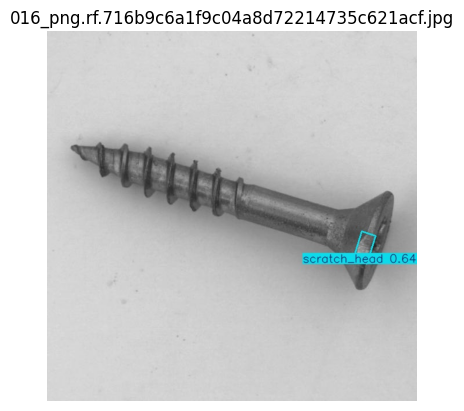

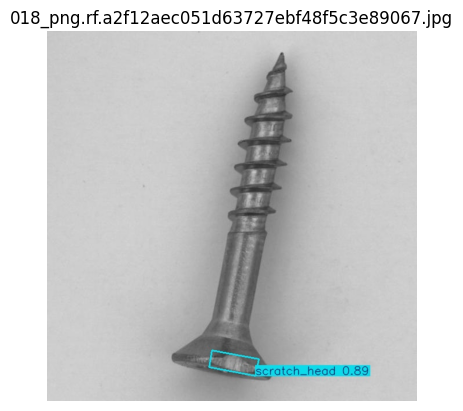

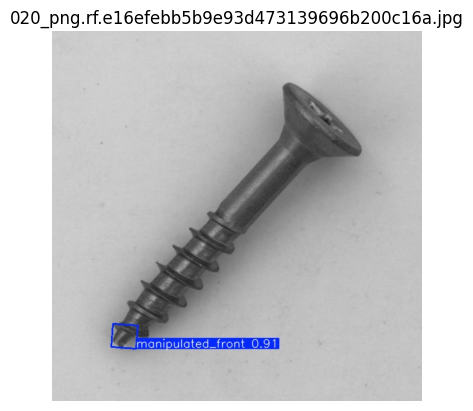

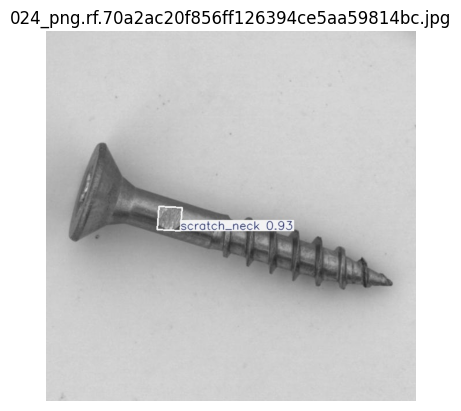

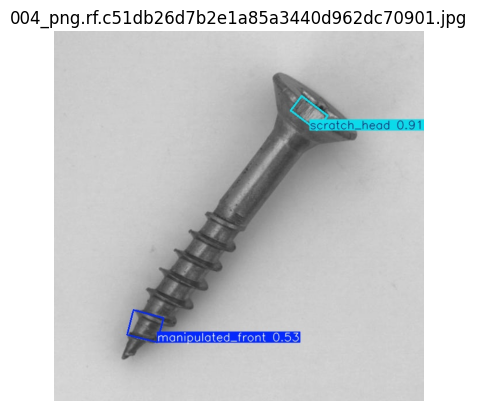

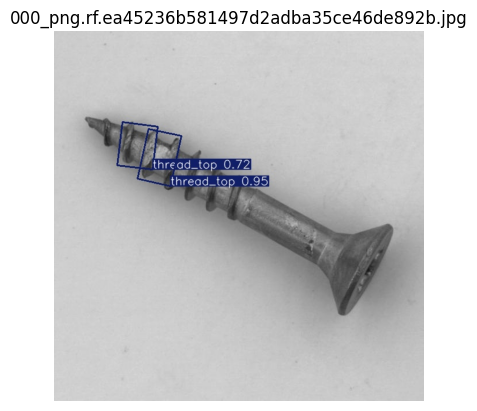

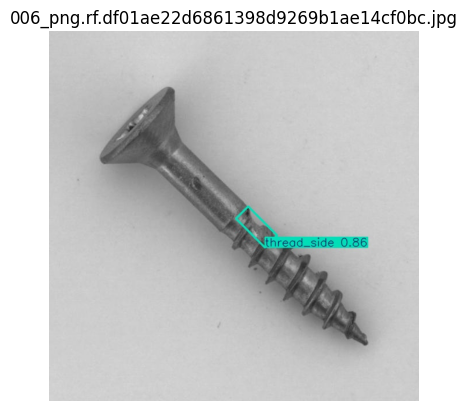

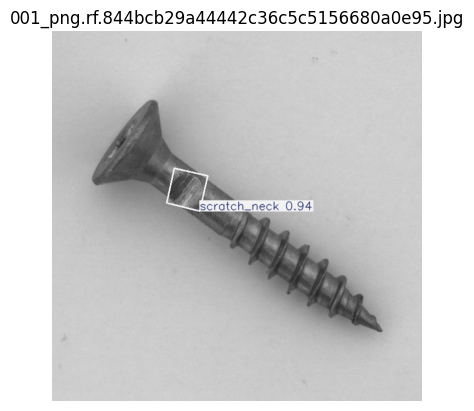

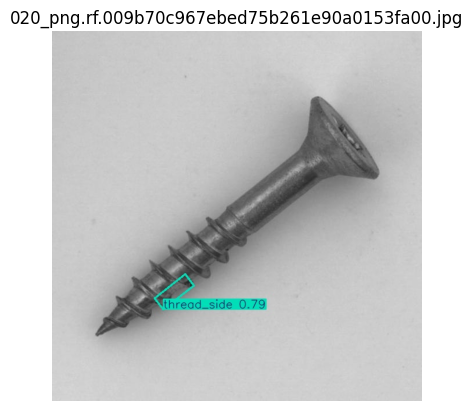

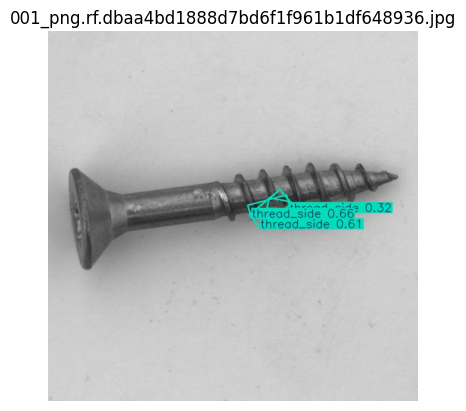

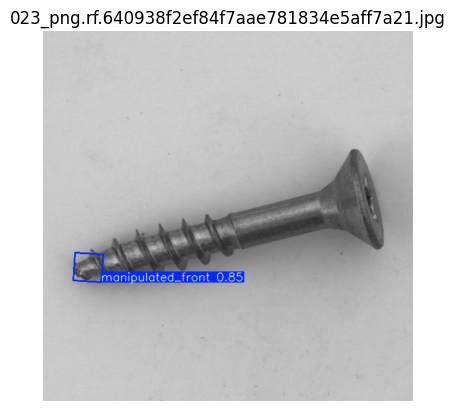

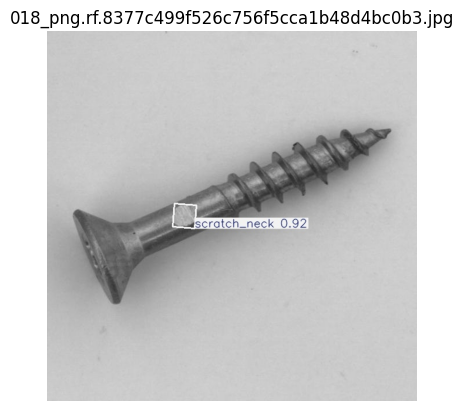

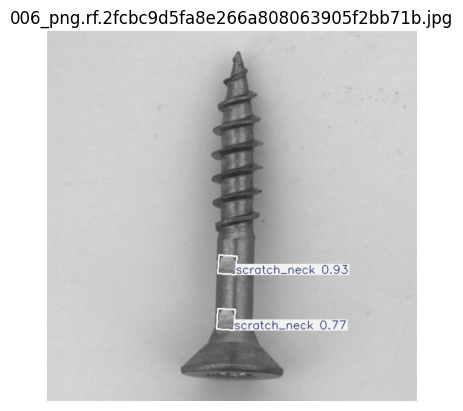

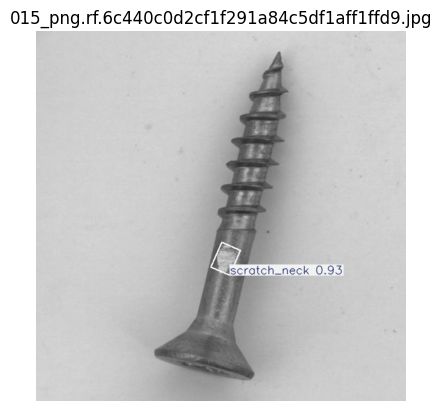

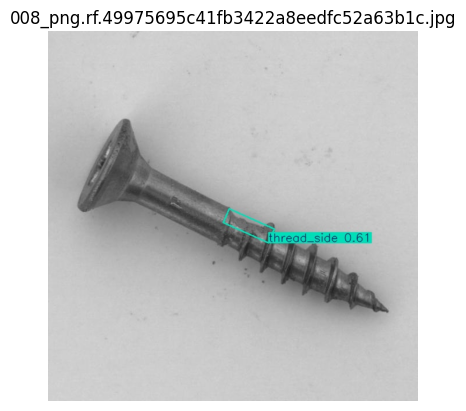

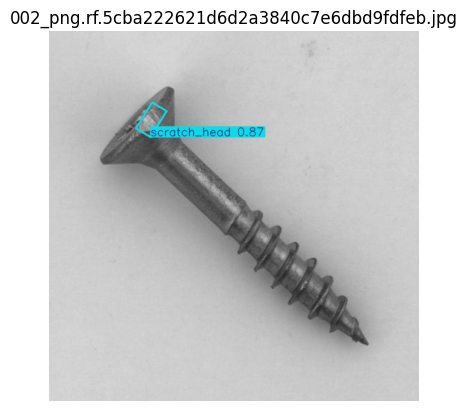

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

folder_path = "/content/runs/obb/predict"  # Tahmin çıktı klasörü

# Klasördeki tüm .jpg veya .png dosyalarını al
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png'))]

for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = cv2.imread(image_path)
    if img is not None:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(image_file)
        plt.axis("off")
        plt.show()
    else:
        print(f"⚠️ {image_path} dosyası okunamadı.")
